 # Project MNIST

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load the MNIST dataset  #0 - 9 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Data exploration and visualization
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


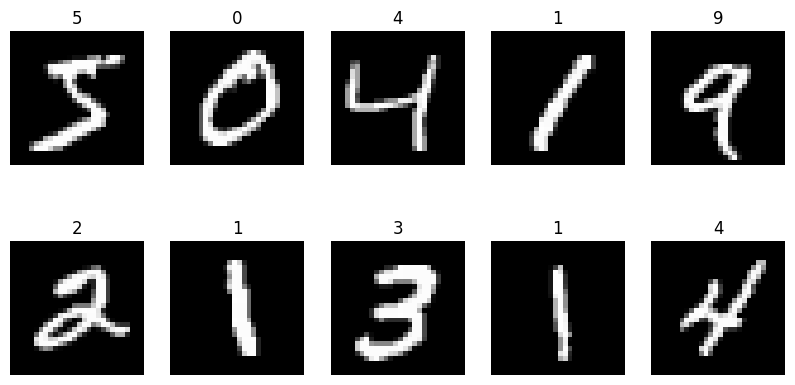

In [3]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

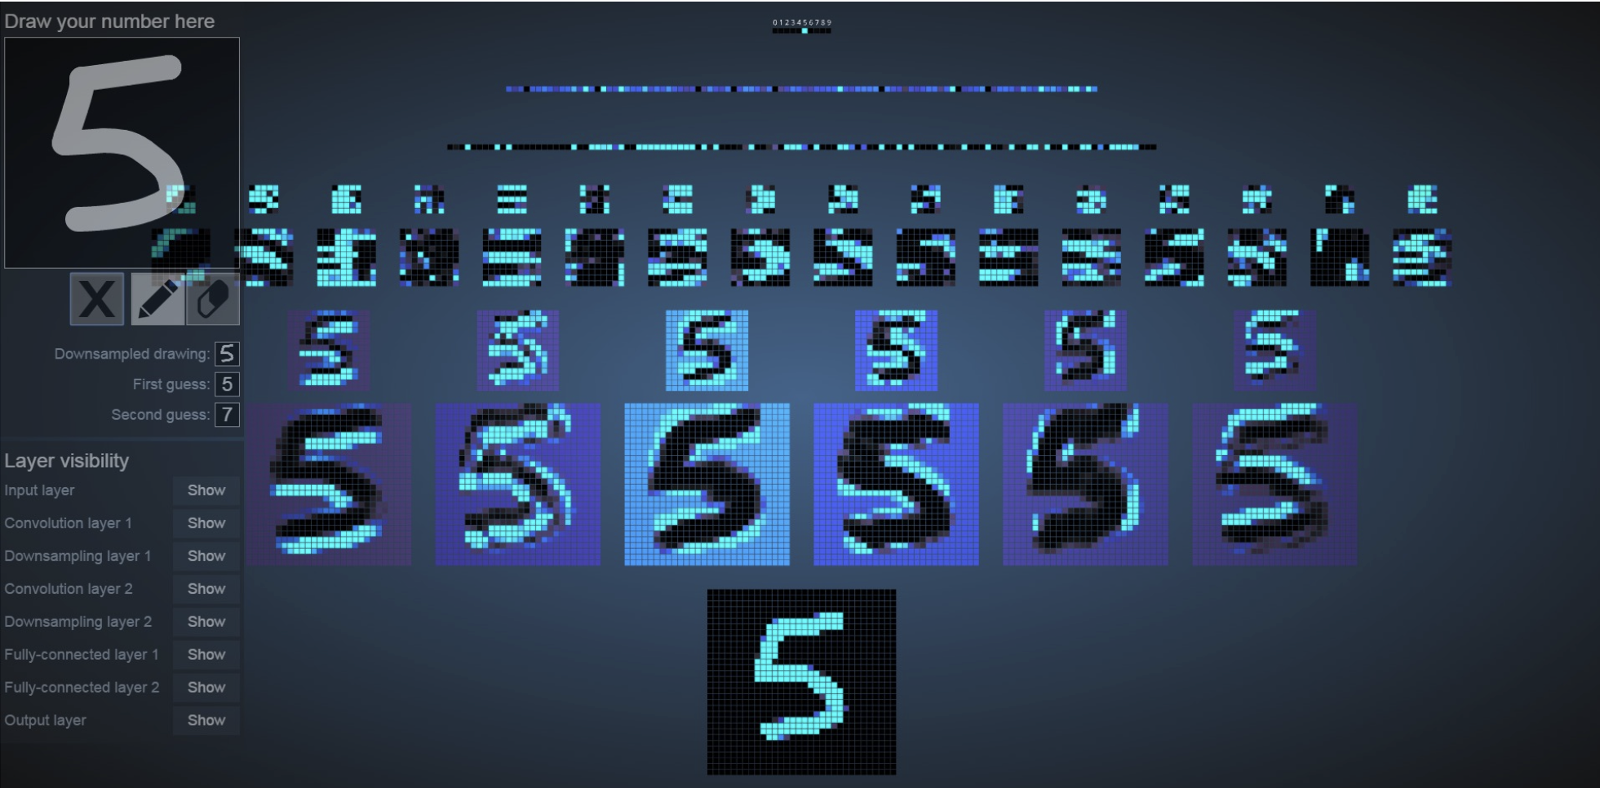

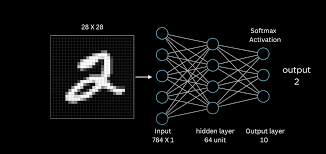

In [4]:
# Data preprocessing
# 112 / 255  0.4 # N

x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

In [5]:
# Convert labels to one-hot encoding 0 1  2  3  4     9 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [6]:
#y_train[0]
y_train[9]
 

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

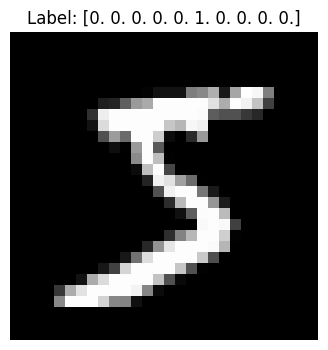

In [7]:
# Visualize one image from x_train at index 0
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')  # Reshape to (28, 28) for 2D visualization
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

In [8]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  #2d to 1d 
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Applications/anaconda3/envs/spyder/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# SGD 

In [9]:
# Compile the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10 , batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1984 - loss: 2.2815 - val_accuracy: 0.5129 - val_loss: 2.1784
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5467 - loss: 2.1150 - val_accuracy: 0.6577 - val_loss: 1.7417
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6705 - loss: 1.5272 - val_accuracy: 0.7809 - val_loss: 0.8841
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7843 - loss: 0.8127 - val_accuracy: 0.8555 - val_loss: 0.5505
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8514 - loss: 0.5432 - val_accuracy: 0.8858 - val_loss: 0.4242
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8763 - loss: 0.4445 - val_accuracy: 0.8964 - val_loss: 0.3632
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8920 - loss: 0.3812 - val_accuracy: 0.9084 - val_loss: 0.3246
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9001 - loss: 0.3456 - val_acc

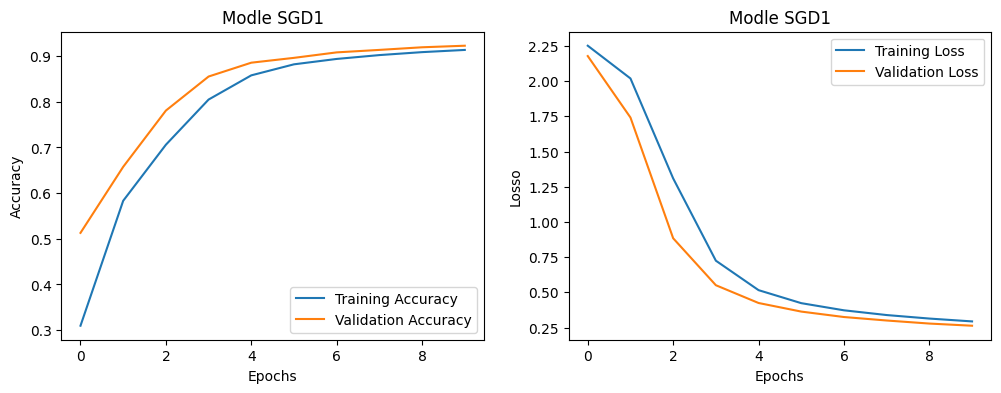

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Modle SGD1')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Losso')
plt.legend()
plt.title('Modle SGD1')

plt.show()

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9097 - loss: 0.3023
Test Accuracy: 0.9229999780654907


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


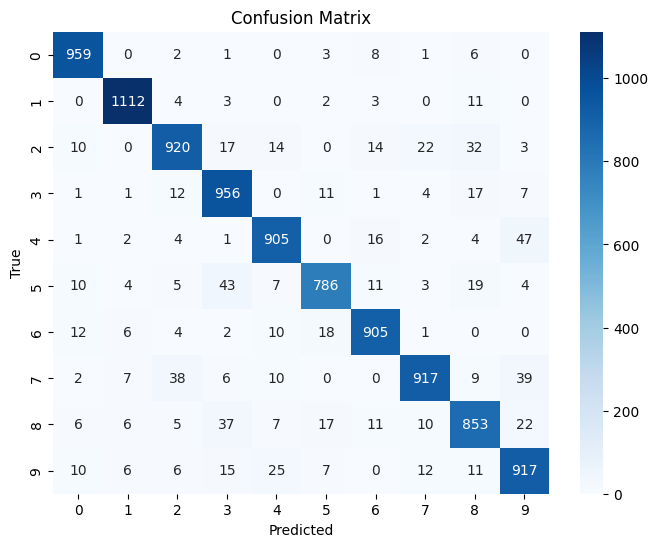

In [12]:
# Visualize confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Make predictions for a test image
sample_image = x_test[0].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f'True Label: {np.argmax(y_test[0])}')
print(f'Predicted Label: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
True Label: 7
Predicted Label: 7


In [10]:
# Compile the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10 , batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7980 - loss: 0.6273 - val_accuracy: 0.9730 - val_loss: 0.0915
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9740 - loss: 0.0867 - val_accuracy: 0.9821 - val_loss: 0.0634
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9824 - loss: 0.0581 - val_accuracy: 0.9786 - val_loss: 0.0716
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9861 - loss: 0.0415 - val_accuracy: 0.9820 - val_loss: 0.0617
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9868 - val_loss: 0.0469
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9911 - loss: 0.0256 - val_accuracy: 0.9872 - val_loss: 0.0480
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9880 - val_loss: 0.0434
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accu

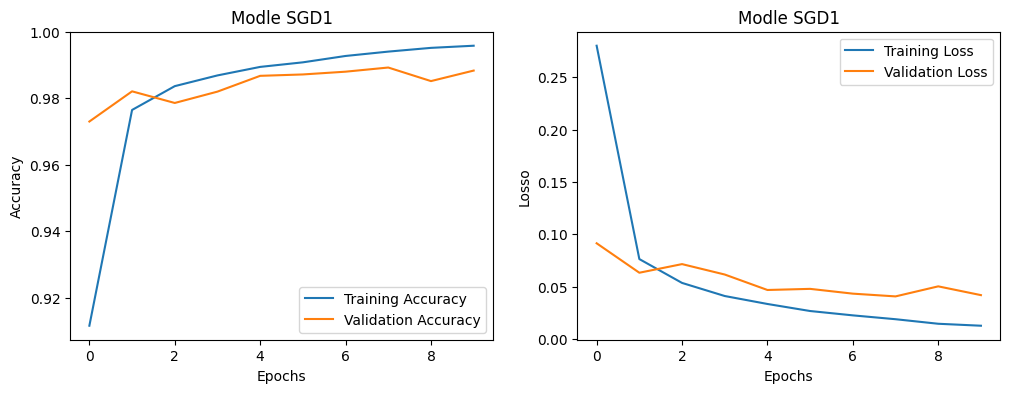

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Modle SGD1')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Losso')
plt.legend()
plt.title('Modle SGD1')

plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0403
Test Accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


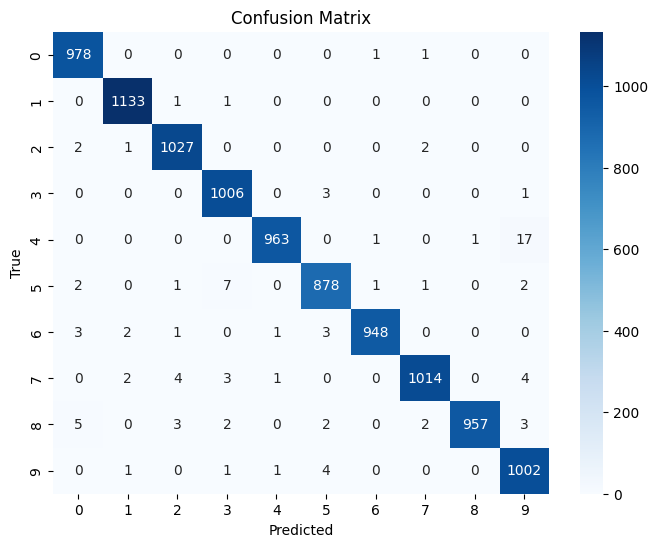

In [13]:
# Visualize confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Make predictions for a test image
sample_image = x_test[0].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f'True Label: {np.argmax(y_test[0])}')
print(f'Predicted Label: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
True Label: 7
Predicted Label: 7


# SGD 2

In [10]:
# Compile the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model2
history = model.fit(x_train, y_train, epochs=10 , batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4720 - loss: 1.6671 - val_accuracy: 0.9043 - val_loss: 0.3064
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9127 - loss: 0.2880 - val_accuracy: 0.9495 - val_loss: 0.1815
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9445 - loss: 0.1871 - val_accuracy: 0.9567 - val_loss: 0.1490
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9604 - loss: 0.1370 - val_accuracy: 0.9647 - val_loss: 0.1210
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9655 - loss: 0.1145 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9716 - loss: 0.0950 - val_accuracy: 0.9704 - val_loss: 0.0987
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9730 - loss: 0.0891 - val_accuracy: 0.9765 - val_loss: 0.0805
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9757 - loss: 0.0786 - val_accu

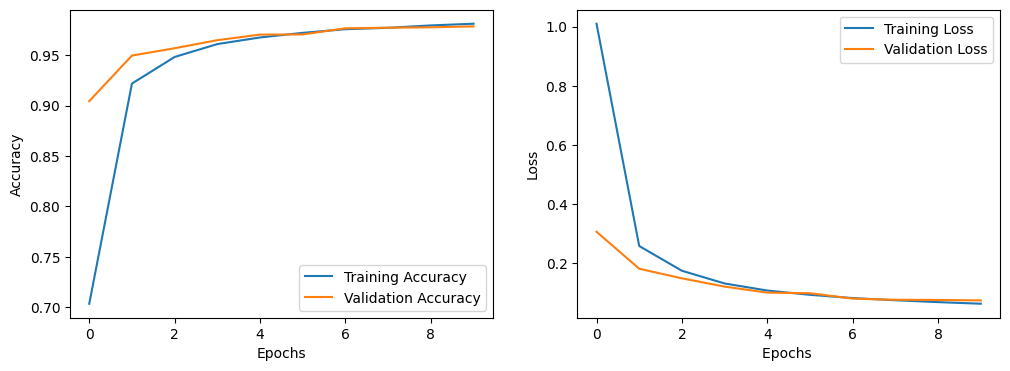

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend()
plt.title('Modle SGD1')

plt.show()

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0725
Test Accuracy: 0.9811999797821045


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


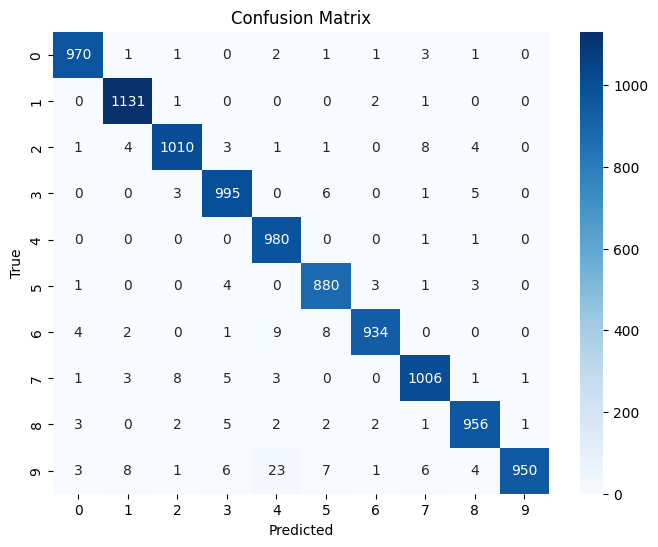

In [14]:
# Visualize confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Make predictions for a test image
sample_image = x_test[0].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f'True Label: {np.argmax(y_test[0])}')
print(f'Predicted Label: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
True Label: 7
Predicted Label: 7


## SGD2 Again

In [10]:
# Compile the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model2
history = model.fit(x_train, y_train, epochs=10 , batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4956 - loss: 1.5957 - val_accuracy: 0.8940 - val_loss: 0.3264
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9172 - loss: 0.2765 - val_accuracy: 0.9517 - val_loss: 0.1731
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9475 - loss: 0.1760 - val_accuracy: 0.9596 - val_loss: 0.1434
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9589 - loss: 0.1376 - val_accuracy: 0.9702 - val_loss: 0.1084
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9655 - loss: 0.1114 - val_accuracy: 0.9712 - val_loss: 0.1014
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9705 - loss: 0.0956 - val_accuracy: 0.9726 - val_loss: 0.0933
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9742 - loss: 0.0837 - val_accuracy: 0.9740 - val_loss: 0.0881
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9761 - loss: 0.0791 - val_accu

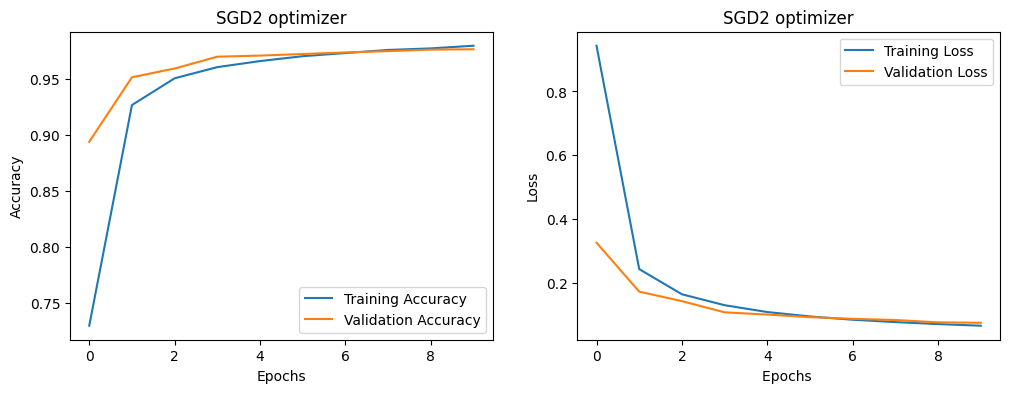

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('SGD2 optimizer')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend()
plt.title('SGD2 optimizer')


plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0707
Test Accuracy: 0.9799000024795532


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


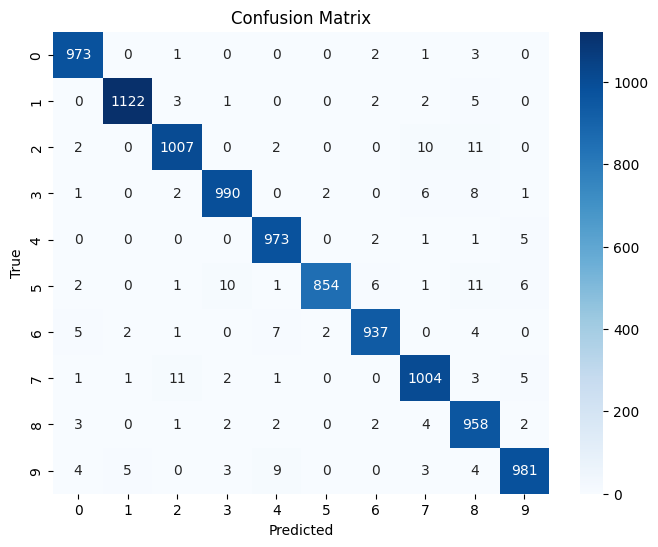

In [13]:
# Visualize confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Make predictions for a test image
sample_image = x_test[0].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f'True Label: {np.argmax(y_test[0])}')
print(f'Predicted Label: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
True Label: 7
Predicted Label: 7


# Adam

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10 , batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8680 - loss: 0.4238 - val_accuracy: 0.9794 - val_loss: 0.0678
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9840 - val_loss: 0.0522
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9887 - loss: 0.0381 - val_accuracy: 0.9880 - val_loss: 0.0399
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9914 - loss: 0.0293 - val_accuracy: 0.9880 - val_loss: 0.0410
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9881 - val_loss: 0.0415
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9886 - val_loss: 0.0393
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9968 - loss: 0.0115 - val_accuracy: 0.9868 - val_loss: 0.0516
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9966 - loss: 0.0100 - val_acc

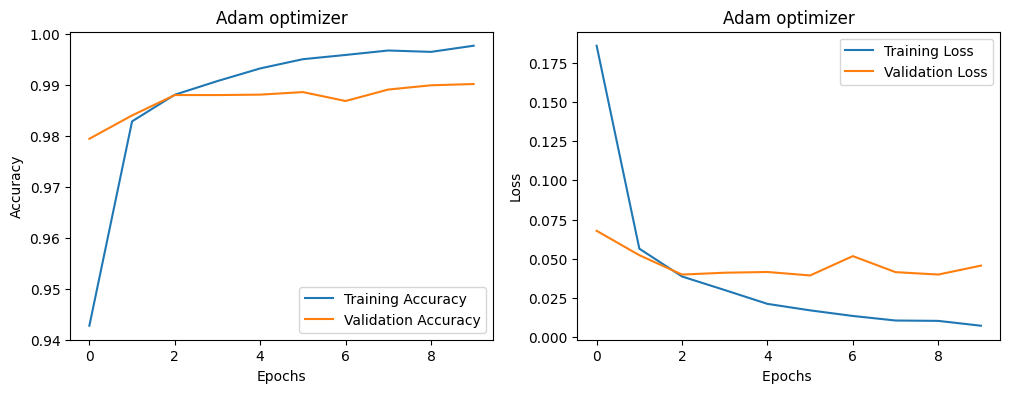

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Adam optimizer')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend()
plt.title('Adam optimizer')

plt.show()

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0434
Test Accuracy: 0.9914000034332275


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


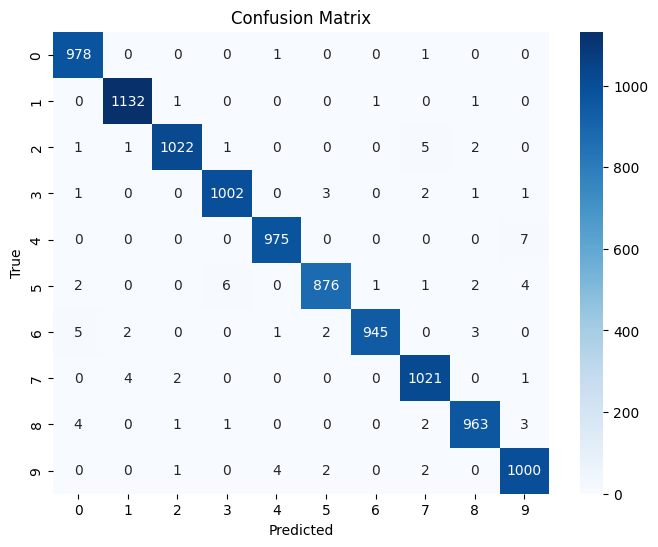

In [12]:
# Visualize confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Make predictions for a test image
sample_image = x_test[0].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f'True Label: {np.argmax(y_test[0])}')
print(f'Predicted Label: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
True Label: 7
Predicted Label: 7


# Adam
- https://keras.io/api/optimizers/adam/
# SGD
- https://keras.io/api/optimizers/sgd/
# RMSprop
- https://keras.io/api/optimizers/rmsprop/